In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

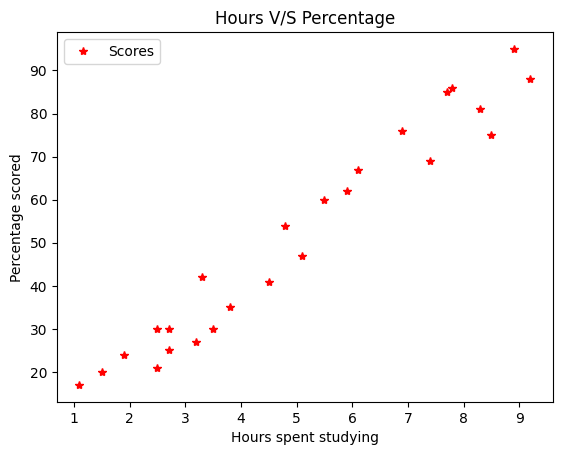

In [6]:
data.plot(x='Hours', y='Scores',style='*',color='red')
plt.title("Hours V/S Percentage")
plt.xlabel("Hours spent studying")
plt.ylabel("Percentage scored")
plt.show()

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

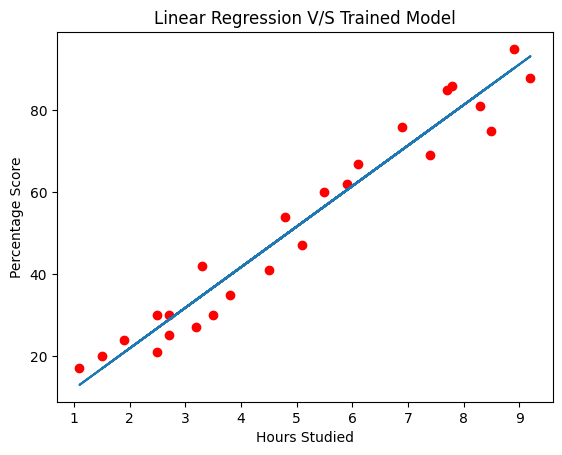

In [18]:
line=regressor.coef_*x+regressor.intercept_
plt.title("Linear Regression V/S Trained Model")
plt.scatter(x,y,color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.plot(x,line)
plt.show()

In [21]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [23]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Axes: >

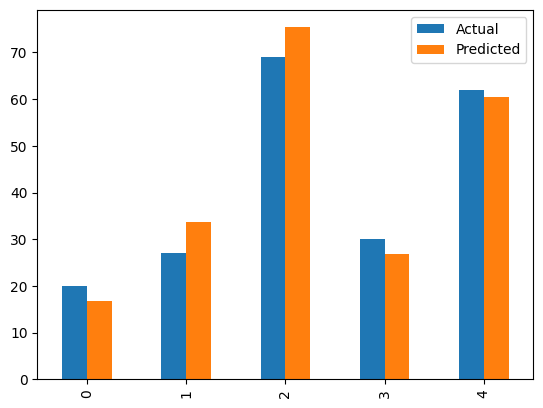

In [24]:
df.plot(kind='bar')

In [25]:
hours=9.25
test=np.array([hours])
test=test.reshape(1,-1)
pred=regressor.predict([[9.5]])
print("Number of hours={}".format(hours))
print("Predicted Score={}".format(pred[0]))

Number of hours=9.25
Predicted Score=96.16939660753593


In [27]:
print('Mean Absolute Error is: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error is: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared error is: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error is:  4.183859899002982
Mean Square Error is:  21.598769307217456
Root Mean Squared error is:  2.0454485813637513


In [28]:
print("Slope of Regression Line", regressor.coef_)
print("Y Intercept of Regression Line", regressor.intercept_)

Slope of Regression Line [9.91065648]
Y Intercept of Regression Line 2.018160041434662
